This notebook wants to show to use the tubesML package, we will first go through the basic functionalities and then show how these functionalities work together.

The main goal of the package is to allow the user to create flexible pipelines for data processing and machine learning. In order to achieve that, each functionality is a wrapper around some class from the very popular scikit-learn in order to maintain the pandas dataframe structure.

In [1]:
import pandas as pd
import numpy as np

import string
import random

from sklearn.datasets import make_classification

import tubesml as tb

Let's begin by creating some data for a typical Machine Learning problem, this will be a classification problem but the same will hold for regression.

In [2]:
def create_data(n_features=20):
    df, target = make_classification(n_features=n_features)
    
    i = 0
    random_names = []
    # generate n_features random strings of 5 characters
    while i < n_features:
        random_names.append(''.join([random.choice(string.ascii_lowercase) for _ in range(5)]))
        i += 1
    
    df = pd.DataFrame(df, columns=random_names)
    # create some random categorical variable
    df['cat'] = ['a', 'b', 'c', 'd', 'e']*20
    # create a column not already scaled and centered
    df['uniform'] = np.random.uniform(low=0, high=20, size=100)

    df['target'] = target
    
    return df

df = create_data(n_features=10)

df.head()

,liyuk,zrrfa,ejbom,njjnp,mnxbm,wilfs,mywhr,exuud,kntlc,tfbfv,cat,uniform,target
0,0.265056,-0.616889,-0.462014,0.335797,-0.646548,-0.329253,-0.611788,0.867926,0.038187,-0.138793,a,5.398777,1
1,0.796723,0.771159,-0.873815,-1.576975,-0.748456,1.050273,0.004786,1.410975,1.161044,1.073212,b,6.633213,0
2,0.017400,-1.378101,-0.110442,-0.405921,-0.193430,0.404398,0.592081,0.047503,0.248441,0.260399,c,10.878493,0
3,-0.536456,-0.965826,-0.275365,1.417551,1.973395,1.972944,0.699379,0.381476,-0.576471,-0.817832,d,11.496472,1
4,0.717710,-1.049468,-0.168010,1.863065,0.330309,-1.358757,-0.303104,-2.514913,-0.843040,-1.101711,e,18.050039,1


# DfImputer

This is a wrapper around sklearn's [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

To show how does it work, let's create some missing values

In [3]:
mask = np.random.choice([True, False], size=df.shape)

mis = df.mask(mask).drop('cat', axis=1)  # categories are normally imputed differently, see below

mis.head()

,liyuk,zrrfa,ejbom,njjnp,mnxbm,wilfs,mywhr,exuud,kntlc,tfbfv,uniform,target
0,NaN,-0.616889,-0.462014,NaN,NaN,NaN,NaN,0.867926,0.038187,NaN,NaN,1.0
1,NaN,0.771159,-0.873815,NaN,-0.748456,1.050273,0.004786,1.410975,1.161044,1.073212,NaN,NaN
2,0.017400,-1.378101,-0.110442,-0.405921,NaN,NaN,NaN,0.047503,0.248441,0.260399,NaN,0.0
3,-0.536456,-0.965826,-0.275365,1.417551,1.973395,NaN,NaN,0.381476,-0.576471,NaN,11.496472,NaN
4,0.717710,-1.049468,-0.168010,NaN,0.330309,NaN,NaN,-2.514913,NaN,NaN,18.050039,NaN


We can call the fit method

In [4]:
imp = tb.DfImputer()

imp.fit(mis)

DfImputer(fill_value=None, strategy='mean')

In [5]:
imp.statistics_

liyuk       0.009944
zrrfa       0.024287
ejbom       0.001315
njjnp       0.060898
mnxbm       0.076698
wilfs       0.127651
mywhr      -0.047861
exuud      -0.021234
kntlc       0.120189
tfbfv       0.100911
uniform    12.405589
target      0.521739
dtype: float64

In [6]:
imp.transform(mis).head()

,liyuk,zrrfa,ejbom,njjnp,mnxbm,wilfs,mywhr,exuud,kntlc,tfbfv,uniform,target
0,0.009944,-0.616889,-0.462014,0.060898,0.076698,0.127651,-0.047861,0.867926,0.038187,0.100911,12.405589,1.000000
1,0.009944,0.771159,-0.873815,0.060898,-0.748456,1.050273,0.004786,1.410975,1.161044,1.073212,12.405589,0.521739
2,0.017400,-1.378101,-0.110442,-0.405921,0.076698,0.127651,-0.047861,0.047503,0.248441,0.260399,12.405589,0.000000
3,-0.536456,-0.965826,-0.275365,1.417551,1.973395,0.127651,-0.047861,0.381476,-0.576471,0.100911,11.496472,0.521739
4,0.717710,-1.049468,-0.168010,0.060898,0.330309,0.127651,-0.047861,-2.514913,0.120189,0.100911,18.050039,0.521739


In [7]:
mis.head()

,liyuk,zrrfa,ejbom,njjnp,mnxbm,wilfs,mywhr,exuud,kntlc,tfbfv,uniform,target
0,NaN,-0.616889,-0.462014,NaN,NaN,NaN,NaN,0.867926,0.038187,NaN,NaN,1.0
1,NaN,0.771159,-0.873815,NaN,-0.748456,1.050273,0.004786,1.410975,1.161044,1.073212,NaN,NaN
2,0.017400,-1.378101,-0.110442,-0.405921,NaN,NaN,NaN,0.047503,0.248441,0.260399,NaN,0.0
3,-0.536456,-0.965826,-0.275365,1.417551,1.973395,NaN,NaN,0.381476,-0.576471,NaN,11.496472,NaN
4,0.717710,-1.049468,-0.168010,NaN,0.330309,NaN,NaN,-2.514913,NaN,NaN,18.050039,NaN


In [8]:
mis = df.mask(mask)

imp = tb.DfImputer(strategy='constant', fill_value=99)

imp.fit(mis)

DfImputer(fill_value=99, strategy='constant')

In [9]:
imp.statistics_

liyuk      99
zrrfa      99
ejbom      99
njjnp      99
mnxbm      99
wilfs      99
mywhr      99
exuud      99
kntlc      99
tfbfv      99
cat        99
uniform    99
target     99
dtype: object

In [10]:
imp.transform(mis).head()

,liyuk,zrrfa,ejbom,njjnp,mnxbm,wilfs,mywhr,exuud,kntlc,tfbfv,cat,uniform,target
0,99,-0.616889,-0.462014,99,99,99,99,0.867926,0.0381871,99,99,99,1
1,99,0.771159,-0.873815,99,-0.748456,1.05027,0.0047855,1.41098,1.16104,1.07321,b,99,99
2,0.0174001,-1.3781,-0.110442,-0.405921,99,99,99,0.0475026,0.248441,0.260399,99,99,0
3,-0.536456,-0.965826,-0.275365,1.41755,1.97339,99,99,0.381476,-0.576471,99,99,11.4965,99
4,0.71771,-1.04947,-0.16801,99,0.330309,99,99,-2.51491,99,99,99,18.05,99


# DfScaler

This is a wrapper around sklearn's [SandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html), and [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [11]:
sca = tb.DfScaler()

sca.fit(df.drop('cat', axis=1))

DfScaler(feature_range=None, method='standard')

In [12]:
sca.mean_

liyuk       0.030719
zrrfa       0.069120
ejbom      -0.076892
njjnp      -0.065735
mnxbm       0.057704
wilfs       0.122908
mywhr       0.041200
exuud       0.006911
kntlc       0.066219
tfbfv       0.050339
uniform    10.767155
target      0.500000
dtype: float64

In [13]:
sca.scale_

liyuk      0.950245
zrrfa      0.972621
ejbom      1.354201
njjnp      1.312803
mnxbm      1.020401
wilfs      0.927468
mywhr      1.093294
exuud      0.980210
kntlc      0.766597
tfbfv      0.769399
uniform    6.170064
target     0.500000
dtype: float64

In [14]:
res = sca.transform(df.drop('cat', axis=1))

res.head()

,liyuk,zrrfa,ejbom,njjnp,mnxbm,wilfs,mywhr,exuud,kntlc,tfbfv,uniform,target
0,0.246607,-0.705321,-0.284390,0.305858,-0.690172,-0.487522,-0.597267,0.878398,-0.036567,-0.245818,-0.870068,1.0
1,0.806111,0.721801,-0.588483,-1.151155,-0.790043,0.999889,-0.033307,1.432412,1.428162,1.329445,-0.670000,-1.0
2,-0.014016,-1.487960,-0.024775,-0.259130,-0.246113,0.303504,0.503873,0.041411,0.237702,0.273018,0.018045,-1.0
3,-0.596872,-1.064080,-0.146561,1.129861,1.877390,1.994716,0.602015,0.382128,-0.838367,-1.128375,0.118203,1.0
4,0.722962,-1.150077,-0.067286,1.469222,0.267155,-1.597539,-0.314924,-2.572738,-1.186097,-1.497337,1.180358,1.0


Original dataframe
	 Mean: 10.767
	 Std: 6.201
	 Range: 0.266--19.845
Transformed dataframe
	 Mean: -0.0
	 Std: 1.005
	 Range: -1.702--1.471


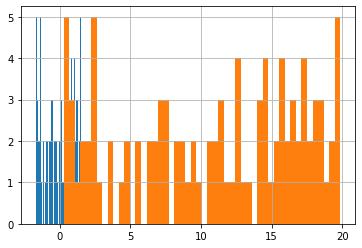

In [15]:
res['uniform'].hist(bins=50)
df['uniform'].hist(bins=50)
print('Original dataframe')
print(f"\t Mean: {round(df['uniform'].mean(), 3)}")
print(f"\t Std: {round(df['uniform'].std(), 3)}")
print(f"\t Range: {round(df['uniform'].min(), 3)}--{round(df['uniform'].max(), 3)}")
print('Transformed dataframe')
print(f"\t Mean: {round(res['uniform'].mean(), 3)}")
print(f"\t Std: {round(res['uniform'].std(), 3)}")
print(f"\t Range: {round(res['uniform'].min(), 3)}--{round(res['uniform'].max(), 3)}")